Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
startups = pd.read_csv("D:/1.0 Studies/DataScience_Excelr/Assignment7_MultipleRegression/50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA and Data Cleaning

In [67]:
# Make a copy of the data and rename columns to avoid spaces between strings
data=startups.copy()
data_1 = data.rename({'R&D Spend':'RDSpend', 'Marketing Spend': 'MarketingSpend'}, axis=1)

In [68]:
data_1.head(2)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [20]:
data_1.isna().sum()

R&DSpend          0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [50]:
#Data information
data_1.groupby(['State']).size()

State
California    17
Florida       16
New York      17
dtype: int64

In [34]:
#Count of duplicated rows
data_1[data_1.duplicated()].shape

(0, 5)

### Data Transformation

In [80]:
#Creating dummy variable for State column
data_2=pd.get_dummies(data_1,columns=['State'])

In [90]:
data_2 = data_2.rename({'State_New York':'State_NewYork'}, axis=1)
data_2.head()
#NO NaN so dropping not required

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


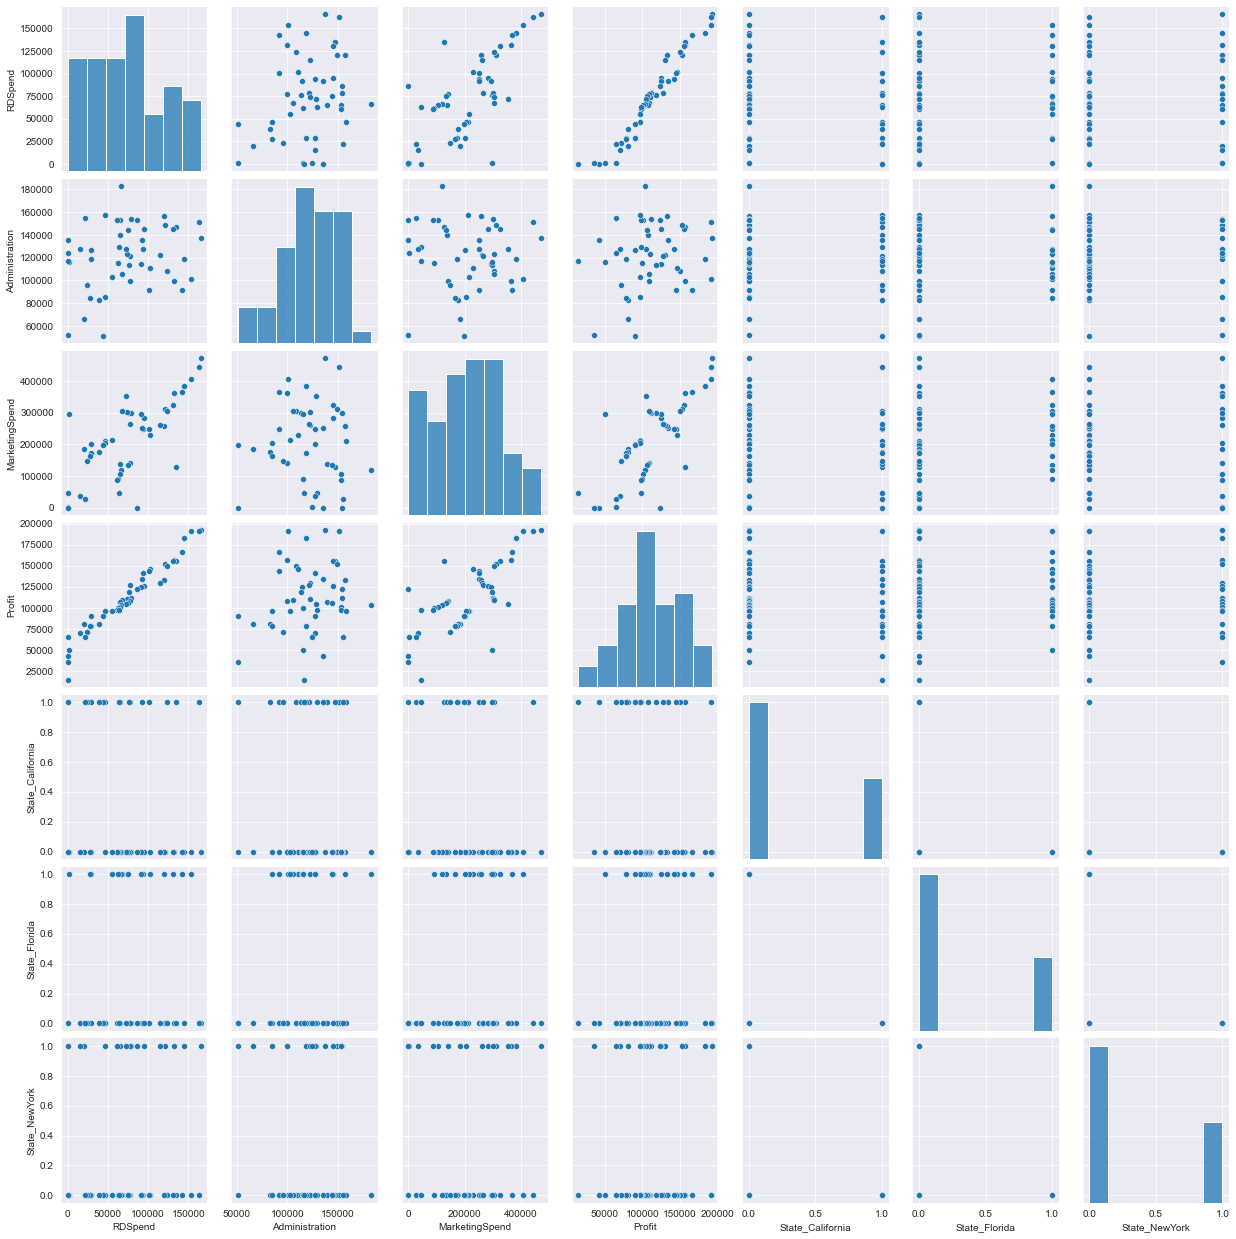

In [76]:
#Scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data_2)

### Preparing the Model

In [82]:
data_2.columns

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [78]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ RDSpend+Administration+MarketingSpend+State_California+State_Florida+State_NewYork',data=data_2).fit()

In [83]:
#Coefficients
model.params

Intercept           37633.233317
RDSpend                 0.806023
Administration         -0.027004
MarketingSpend          0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NewYork       12450.223495
dtype: float64

In [84]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            7.417409
RDSpend             17.368580
Administration      -0.517012
MarketingSpend       1.573889
State_California     5.099242
State_Florida        4.654306
State_NewYork        5.007401
dtype: float64 
 Intercept           2.807645e-09
RDSpend             2.578772e-21
Administration      6.077373e-01
MarketingSpend      1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64


In [85]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.34e-27
Time:                        18:38:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDSpend              0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend       0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Variance Inflation Factor

In [94]:
rsq_RD = smf.ols('RDSpend~Administration+MarketingSpend+State_California+State_Florida+State_NewYork',
                 data=data_2).fit().rsquared  
vif_RD = 1/(1-rsq_RD)

rsq_ADM = smf.ols('Administration~RDSpend+MarketingSpend+State_California+State_Florida+State_NewYork',
                 data=data_2).fit().rsquared  
vif_ADM = 1/(1-rsq_ADM)

rsq_MS = smf.ols('MarketingSpend~RDSpend+Administration+State_California+State_Florida+State_NewYork',
                 data=data_2).fit().rsquared  
vif_MS = 1/(1-rsq_MS)

rsq_CAL = smf.ols('State_California~RDSpend+Administration+MarketingSpend+State_Florida+State_NewYork',
                 data=data_2).fit().rsquared  
#vif_CAL = 1/(1-rsq_CAL) --->Infinity

rsq_FL = smf.ols('State_Florida~State_California+RDSpend+Administration+MarketingSpend+State_NewYork',
                 data=data_2).fit().rsquared  
#vif_FL = 1/(1-rsq_FL) --->Infinity

rsq_NY = smf.ols('State_NewYork~State_California+RDSpend+Administration+MarketingSpend+State_Florida',
                 data=data_2).fit().rsquared  
#vif_NY = 1/(1-rsq_NY) --->Infinity

# Storing vif values in a data frame
d1 = {'Variables':['RDSpend','Administration','MarketingSpend',
                   'State_California','State_Florida','State_NewYork'],
      'VIF':[vif_RD,vif_ADM,vif_MS,vif_CAL,vif_FL,vif_NY]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.495511
1,Administration,1.177766
2,MarketingSpend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


In [97]:
# High VIFs for dummy variables representing nominal variables with three or more categories, are usually not a problem.
# Our dataset is moderately correlated.

### Residual Analysis, Test for Normality, Q-Q Plot

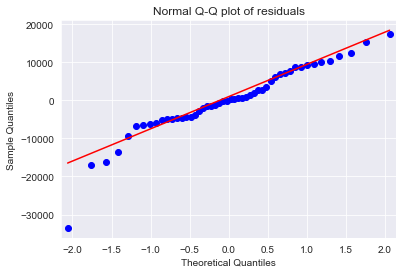

In [110]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line ='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [115]:
list(np.where(model.resid>1000)) # A difference of $1000

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 34, 35, 36, 38, 40,
        41, 43, 45], dtype=int64)]

### Residual Plot for Homoscedasticity

In [117]:
#Plot standardized values of residuals and fitted values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

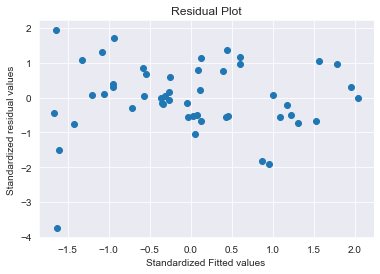

In [118]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
# Plot above shows hwteroscadestic distribution. Outliers are probable in the dataset
# https://stats.stackexchange.com/questions/76226/interpreting-the-residuals-vs-fitted-values-plot-for-verifying-the-assumptions

<AxesSubplot:>

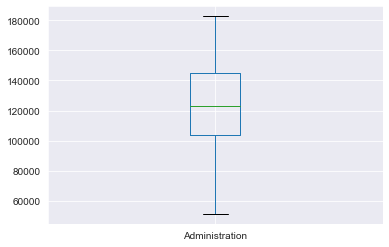

In [129]:
#data_2.boxplot(column =['RDSpend'])
#data_2.boxplot(column =['Administration'])
data_2.boxplot(column =['Administration'])

### Residual vs Regressors

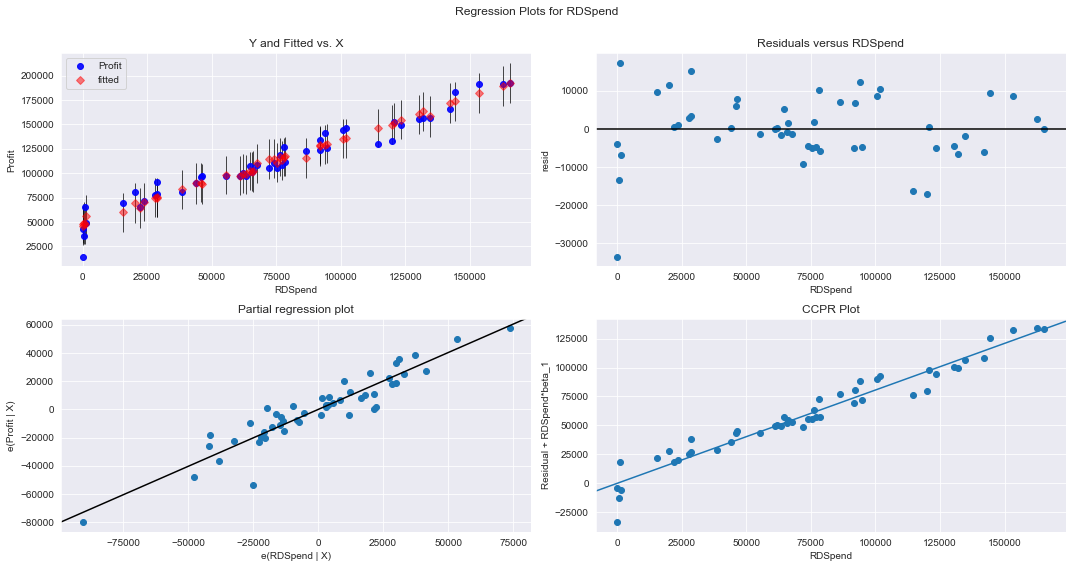

In [135]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

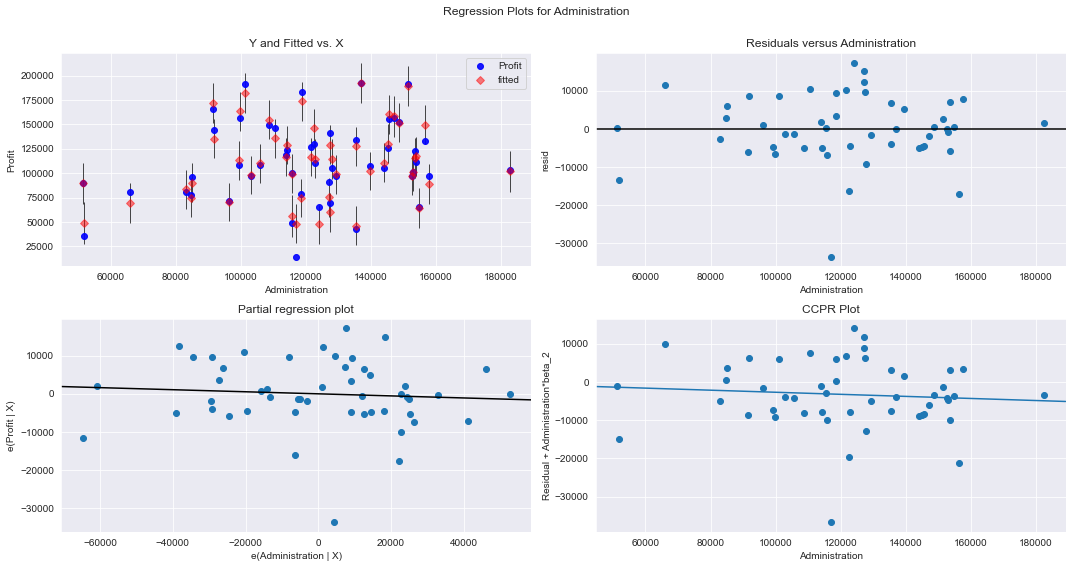

In [141]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

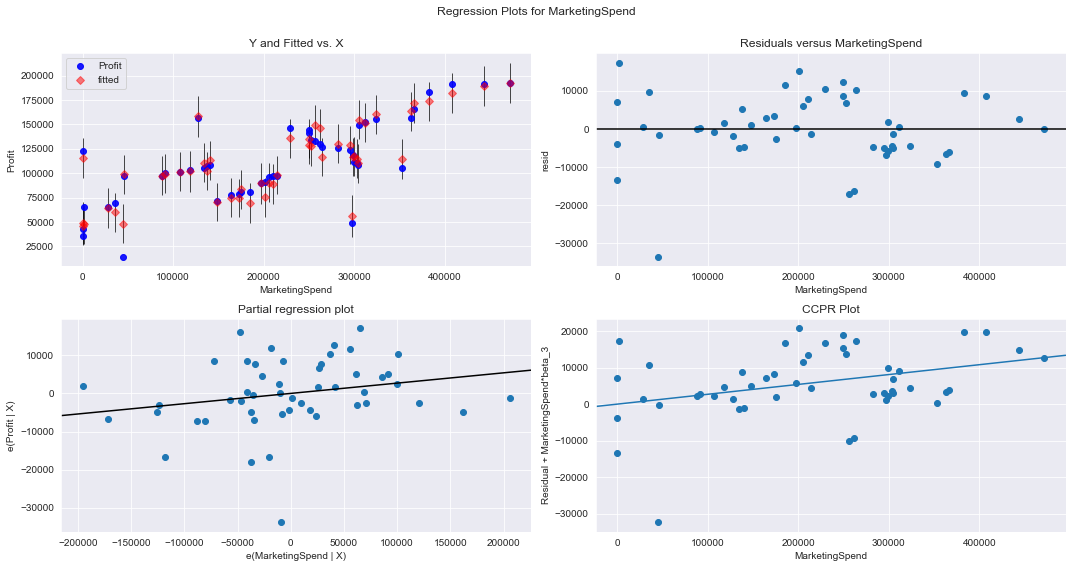

In [140]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

### Detection of Influence/Outliers
### Cook's Distance

In [143]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

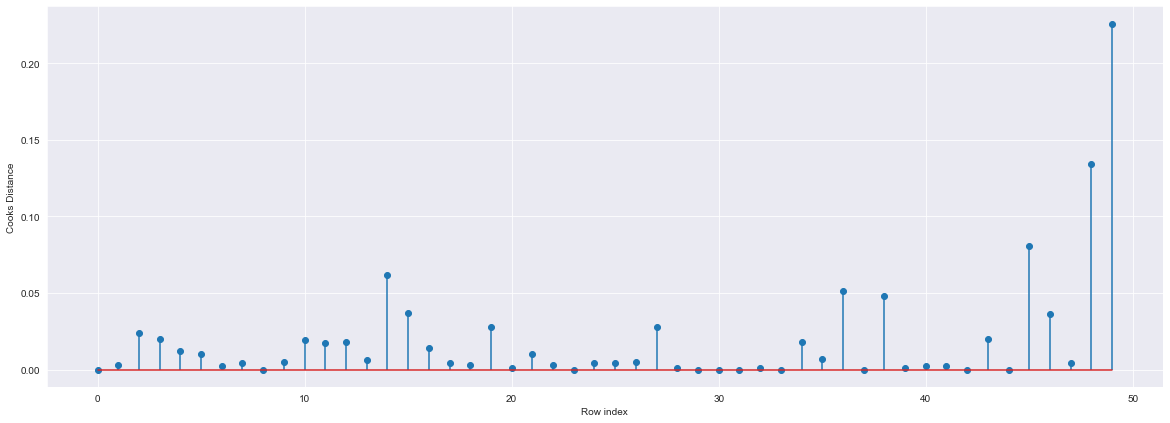

In [144]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [163]:
#Check how lengths look like
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
np.round(c,3)

array([0.   , 0.003, 0.024, 0.02 , 0.012, 0.01 , 0.002, 0.004, 0.   ,
       0.005, 0.019, 0.017, 0.018, 0.006, 0.062, 0.037, 0.014, 0.004,
       0.003, 0.028, 0.001, 0.01 , 0.003, 0.   , 0.004, 0.004, 0.005,
       0.028, 0.001, 0.   , 0.   , 0.   , 0.001, 0.   , 0.018, 0.007,
       0.051, 0.   , 0.048, 0.001, 0.002, 0.002, 0.   , 0.02 , 0.   ,
       0.081, 0.036, 0.004, 0.134, 0.226])

In [182]:
#index and value of influencer where cook's distance is more than .1
#How to find??

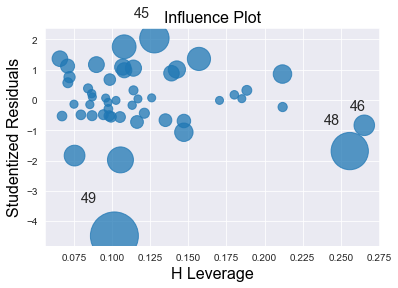

In [183]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [196]:
k = data_2.shape[1]
n = data_2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
(np.argmax(c),np.max(c)), leverage_cutoff

((49, 0.22625094501509285), 0.48)

#### From the plot above it can be said that none of the points are outliers/influencers

In [193]:
data_2[data_2.index.isin([46,49])] #Just to check. These point are not influencers.

,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_NewYork
46,1315.46,115816.21,297114.46,49490.75,0,1,0
49,0.00,116983.80,45173.06,14681.40,1,0,0


## Predicting new data

In [201]:
#New data for prediction
new_data=pd.DataFrame({'RDSpend':1234,'Administration':111111,'MarketingSpend':120300,"State_California":1,
                       "State_Florida":0,"State_NewYork":0},index=[1])
model.predict(new_data)

1    51365.176681
dtype: float64

In [202]:
model.predict(data_2.iloc[0:5])

0    192390.571365
1    189071.320106
2    182276.186735
3    173584.976191
4    172277.133819
dtype: float64

In [208]:
y_predict = model.predict(data_2)

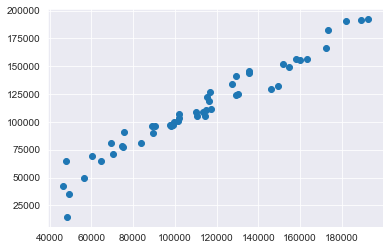

In [211]:
plt.scatter(y_predict,data_2['Profit'])
plt.show()

### This model can further be refined if needed with multiple set of test datasets.